# Лабораторная работа №1 по курсу "Машинное обучение"

Выполнила работу: Матакова М. В. \
Группа: М8О-308Б-17



## Условие


1. Cформировать два набора данных для приложений машинного обучения. 
  * Первый датасет должен представлять из себя табличный набор данных для задачи классификации. 
  * Второй датасет должен быть отличен от первого, и может представлять из себя набор изображений, корпус документов, другой табличный датасет или датасет из соревнования Kaggle, предназначенный для решения интересующей вас задачи машинного обучения. 
2. Провести анализ обоих наборов данных;
3. Поставить решаемую вами задачу;
4. Определить признаки необходимые для решения задачи, в случае необходимости заняться генерацией новых признаков, устранением проблем в данных;
5. Визуализировать распределение и зависимость целевого признака от выбранных признаков. 

В отчете описать все проблемы, с которыми вы столкнулись, и выбранные подходы к их решению.

## Первый датасет


### Описание

Данный датасет содержит рейтинг шоколадных плиток. В нем содержатся следующие поля: 

* название компании по производству плитки; 
* конкретная позиция происхождения плитки; 
* значение, связанное с тем, когда данные былы введен в базу; 
* дата публикации; 
* процентное содержание какао (темного) в шоколадной плитке; 
* страна производитель;
* экспертная оценка;
* разновидность бобов;
* регион происхождения бобов.



### Постановка задачи

Определить к какой группе относится шоколад. В данном примере будут рассматриваться две классификации: по качеству бобов (экспертная оценка) и по содержанию продуктов какао (процентное содержание). 

В первой классификации шоколад делится на:
1. Ужасный
2. Неутешительный (содержит, как минимум, один недостаток)
3. Обычный
4. Премиум 
5. Элитный 

Во второй классификации шоколад бывает:
1. Горьким (> 55%)
2. Десертным (35 - 55%)
3. Молочным (< 35%)

### Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ch_dataset = pd.read_csv('chocolate.csv')
ch_dataset.head().T

,0,1,2,3,4
CompanyÂ\n(Maker-if known),A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
Specific Bean\nOrigin or Bar Name,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
Review \nDate,2016,2015,2015,2015,2015
Cocoa Percent,63%,70%,70%,70%,70%
Company\nLocation,France,France,France,France,France
Rating,3.75,2.75,3,3.5,3.5
Bean Type,Â,Â,Â,Â,Â
Broad Bean\nOrigin,Sao Tome,Togo,Togo,Togo,Peru


### Преобразование данных


Чтобы в дальнейшем было легче работать, преобразуем названия колонок.



In [3]:
new_columns = {
    'CompanyÂ\n(Maker-if known)': 'company',
    'Specific Bean\nOrigin or Bar Name': 'bar_origin',
    'REF': 'review_update_value',
    'Review \nDate': 'review_pub_date',
    'Cocoa Percent': 'cocoa_percentage',
    'Company\nLocation': 'company_location',
    'Rating': 'rating',
    'Bean Type': 'bean_type',
    'Broad Bean\nOrigin': 'bean_origin'
}
ch_dataset = ch_dataset.rename(new_columns, axis='columns')
ch_dataset.head().T

,0,1,2,3,4
company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
bar_origin,Agua Grande,Kpime,Atsane,Akata,Quilla
review_update_value,1876,1676,1676,1680,1704
review_pub_date,2016,2015,2015,2015,2015
cocoa_percentage,63%,70%,70%,70%,70%
company_location,France,France,France,France,France
rating,3.75,2.75,3,3.5,3.5
bean_type,Â,Â,Â,Â,Â
bean_origin,Sao Tome,Togo,Togo,Togo,Peru


Уберем знак %

In [4]:
def clean(el):
    return np.float32(el.split("%")[0])

ch_dataset.cocoa_percentage = ch_dataset.cocoa_percentage.apply(lambda el: clean(el))

Также необходимо заменить все пустые клетки (в данном случае это символ Â) на np.nan

In [5]:
for col in ch_dataset.columns:
    if ch_dataset[col].dtype == 'O':
        ch_dataset[col] = ch_dataset[col].apply(lambda l: np.nan if l == 'Â ' else l)

### Визуализация, подготовка и анализ данных

Сначала можно посмотреть сколько плиток соответствует определенной экспертной оценке



(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

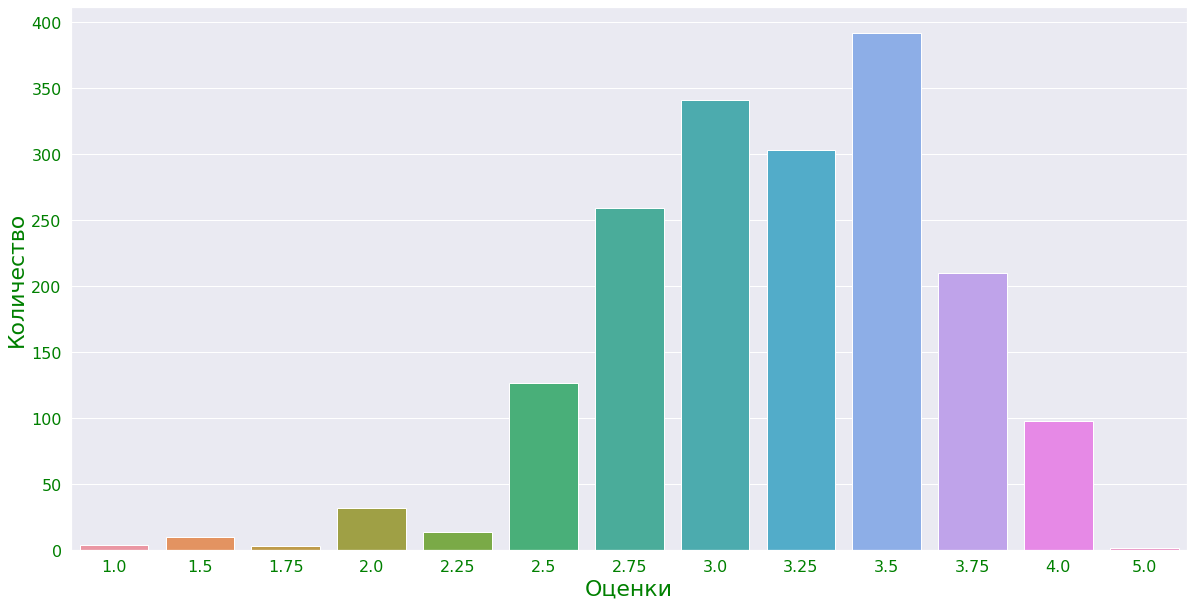

In [6]:
rating_counts = ch_dataset.rating.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel("Оценки", color='green', size=22)
plt.ylabel("Количество", color='green', size=22)
plt.xticks(color='green', size=16)
plt.yticks(color='green', size=16)

Преобразуем экспертные оценки в более удобный формат для классификации по качетсву бобов.

In [7]:
def map_to_rating(l):
    if l <= 2:
        return 1
    elif 2 < l < 3:
        return 2 
    elif 3 <= l <= 3.5:
        return 3
    elif 3.5 < l <= 4:
        return 4
    elif l <= 5:
        return 5

In [8]:
ch_dataset["new_rating"] = ch_dataset.rating.apply(lambda l: map_to_rating(l))
ch_dataset

,company,bar_origin,review_update_value,review_pub_date,cocoa_percentage,company_location,rating,bean_type,bean_origin,new_rating
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome,4
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo,2
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo,3
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo,3
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru,3
...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,NaN,Peru,4
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo,3
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India,3
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,NaN,India,3


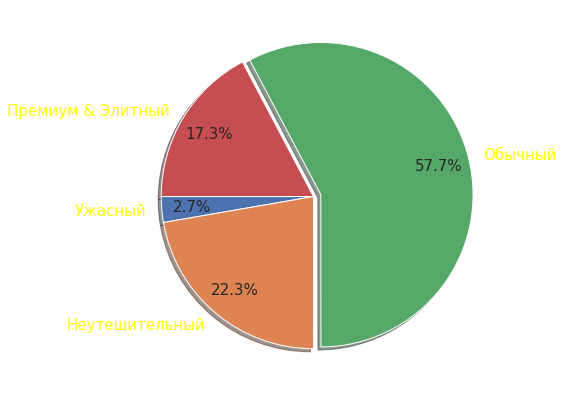

In [9]:
label_names=['Ужасный','Неутешительный','Обычный', 'Премиум & Элитный']
sizes = [ch_dataset[ch_dataset['new_rating'] == 1].shape[0],ch_dataset[ch_dataset['new_rating'] == 2].shape[0],
         ch_dataset[ch_dataset['new_rating'] == 3].shape[0], ch_dataset[ch_dataset['new_rating'] >= 4].shape[0]]
explode = (0,0,0.05, 0)
plt.figure(figsize=(7,7))
autotexts = plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%', pctdistance=0.8,startangle=180,shadow=True)
plt.setp(autotexts[2], size=15)
plt.setp(autotexts[1], size=15, color='yellow')
plt.axis()
plt.show()

(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 9 Text major ticklabel objects>)

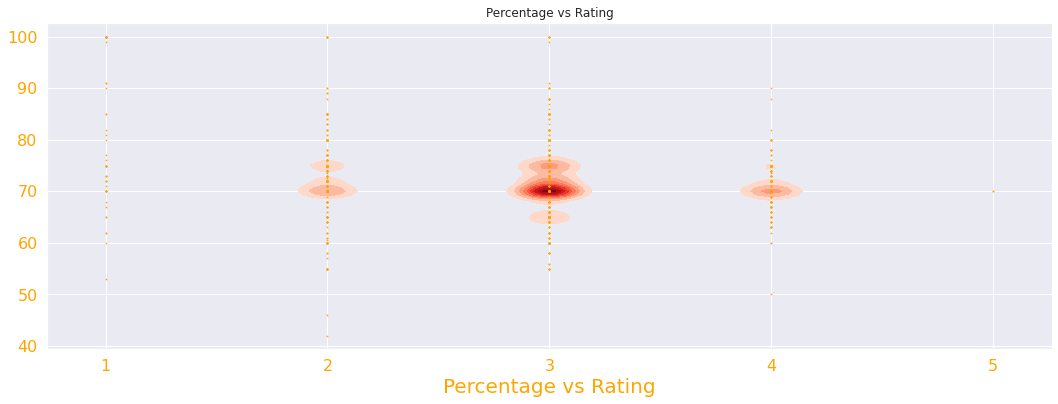

In [10]:
plt.figure(figsize=(18, 6))
ax=sns.kdeplot(ch_dataset.new_rating, ch_dataset.cocoa_percentage, cmap="Reds", shade=True, n_levels=10,shade_lowest=False);
ax.scatter(ch_dataset.new_rating, ch_dataset.cocoa_percentage, s=0.5, c="Orange")
plt.title('Percentage vs Rating')
plt.ylabel(ylabel='', color='orange')
plt.xlabel(xlabel='Percentage vs Rating', color='orange', size=20)
plt.xticks(color='orange', size=16)
plt.yticks(color='orange', size=16)

## Второй датасет

### Описание

Этот датасет содержит 515 отзывов туристов и оценки 1493 отелей премиум класса Европы, а также георграфическое положение. В нем содержатся следующие поля: 

* Адрес отеля;
* Дата публикации отзыва; 
* Среднее значение, которое рассчитывается на основе последнего отзыва в прошлом году; 
* Название отеля; 
* Национальность рецензента; 
* Негативный отзыв рецензент дал в отель. Если рецензент не дает отрицательный отзыв, то должно быть:"No Negative";
* Общее количество слов в отрицательном отзыве;
* Положительный отзыв рецензент дал в отель. Если рецензент не дает положительный отзыв, то должно быть:"No Positive";
* Общее количество слов в положительном отзыве;
* Оценка, которую рецензент дал отелю, основываясь на его/ее опыте;
* Количество отзывов, которые рецензенты дали в прошлом;
* Общее количество действительных отзывов об отеле;
* Теги, котрые рецензент дал отелю;
* Продолжительность между датой публикации отзыва и датой очистки;
* Есть также некоторые гости, которые только сделали оценку на сервисе, а не отзыв. Это число указывает на количество действительных баллов без обзора.
* Широта отеля
* Долгота отеля



### Постановка задачи

Задача будет заключаться в определении настроения человека, оставившего свой отзыв, насколько понравился/не понравился данный отель.

### Загрузка данных

In [61]:
hotel_dataset = pd.read_csv('hotel.csv')
hotel_dataset.head().T

,0,1,2,3,4
Hotel_Address,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
Additional_Number_of_Scoring,194,194,194,194,194
Review_Date,8/3/2017,8/3/2017,7/31/2017,7/31/2017,7/24/2017
Average_Score,7.7,7.7,7.7,7.7,7.7
Hotel_Name,Hotel Arena,Hotel Arena,Hotel Arena,Hotel Arena,Hotel Arena
Reviewer_Nationality,Russia,Ireland,Australia,United Kingdom,New Zealand
Negative_Review,I am so angry that i made this post available...,No Negative,Rooms are nice but for elderly a bit difficul...,My room was dirty and I was afraid to walk ba...,You When I booked with your company on line y...
Review_Total_Negative_Word_Counts,397,0,42,210,140
Total_Number_of_Reviews,1403,1403,1403,1403,1403
Positive_Review,Only the park outside of the hotel was beauti...,No real complaints the hotel was great great ...,Location was good and staff were ok It is cut...,Great location in nice surroundings the bar a...,Amazing location and building Romantic setting


### Преобразование данных

In [83]:
new_columns = {
    'Hotel_Address': 'hotel_address',
    'Review_Date': 'review_date',
    'Average_Score': 'average_score',
    'Hotel_Name': 'hotel_name',
    'Reviewer_Nationality': 'reviewer_nationality',
    'Negative_Review': 'negative_review',
    'ReviewTotalNegativeWordCounts': 'total_neg_words',
    'Positive_Review': 'positive_review',
    'Review_Total_Negative_Word_Counts': 'total_pos_words',
    'Reviewer_Score': 'reviewer_score',
    'Total_Number_of_Reviews_Reviewer_Has_Given': 'total_given_reviews',
    'Total_Number_of_Reviews': 'total_reviews',
    'Tags': 'tags',
    'days_since_review': 'days_since_review',
    'Additional_Number_of_Scoring': 'additional_score',
    'lat': 'lat',
    'lng': 'lng'
}
hotel_dataset = hotel_dataset.rename(new_columns, axis='columns')
hotel_dataset.head().T

,0,1,2,3,4
hotel_address,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
additional_score,194,194,194,194,194
review_date,8/3/2017,8/3/2017,7/31/2017,7/31/2017,7/24/2017
average_score,7.7,7.7,7.7,7.7,7.7
hotel_name,Hotel Arena,Hotel Arena,Hotel Arena,Hotel Arena,Hotel Arena
reviewer_nationality,Russia,Ireland,Australia,United Kingdom,New Zealand
negative_review,i am so angry that i made this post available...,no negative,rooms are nice but for elderly a bit difficul...,my room was dirty and i was afraid to walk ba...,you when i booked with your company on line y...
total_pos_words,397,0,42,210,140
total_reviews,1403,1403,1403,1403,1403
positive_review,only the park outside of the hotel was beauti...,no real complaints the hotel was great great ...,location was good and staff were ok it is cut...,great location in nice surroundings the bar a...,amazing location and building romantic setting


In [70]:
def clean(text):
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace(r"^[a-zA-Z ]", "")
    text = ''.join([i for i in text if not i.isdigit()])
    return text

positive_reviews = hotel_dataset["positive_review"].values
negative_reviews = hotel_dataset['negative_review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

hotel_dataset['positive_review'] = cleaned_positive_reviews
hotel_dataset['negative_review'] = cleaned_negative_reviews


### Визуализация и анализ данных

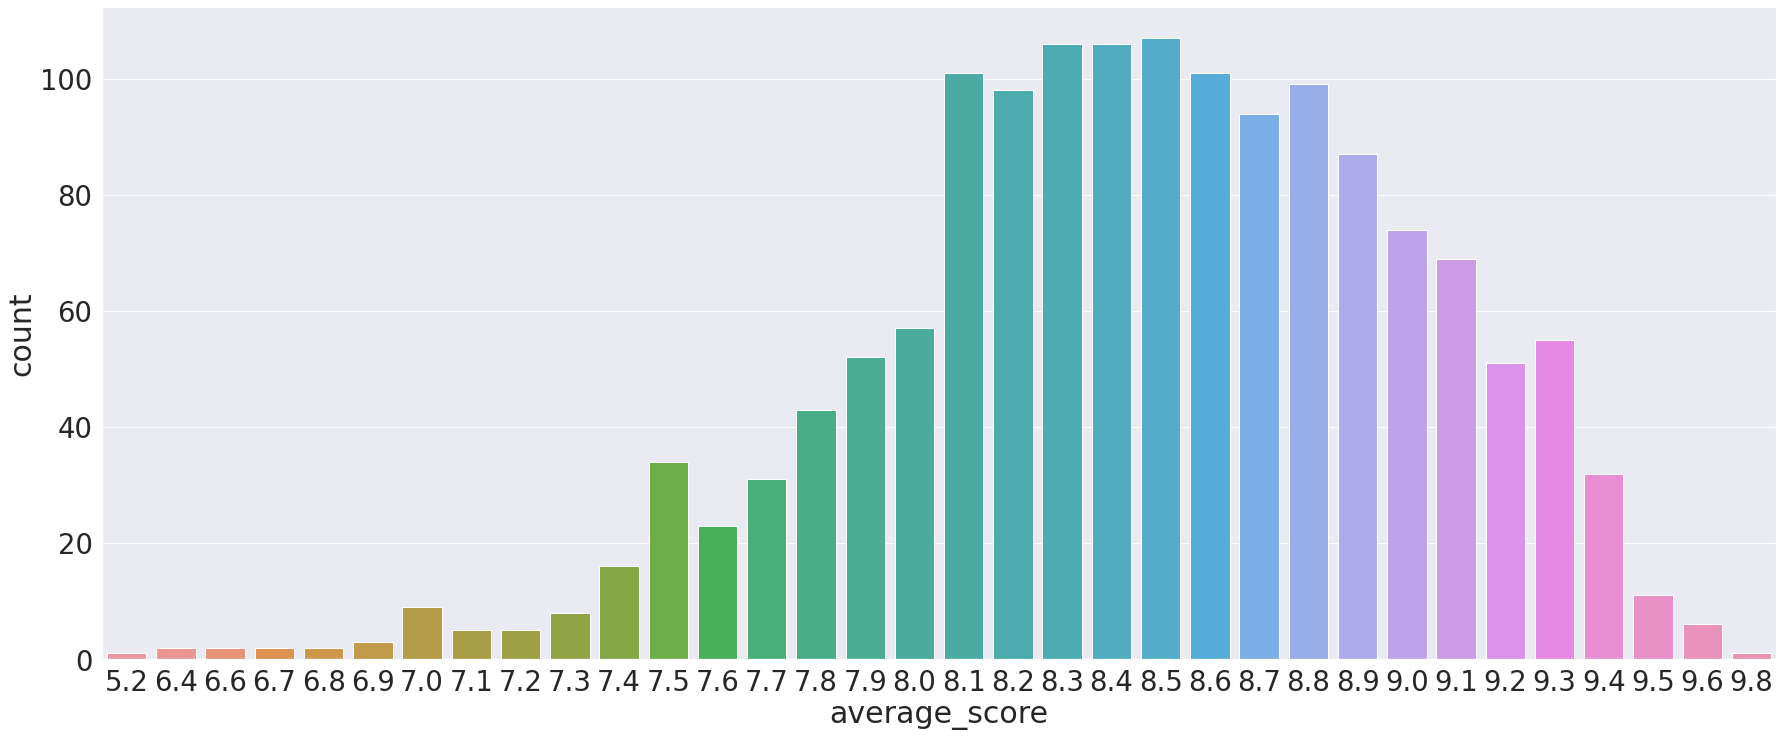

In [79]:
data_plot = hotel_dataset[["hotel_name","average_score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "average_score",data=data_plot)

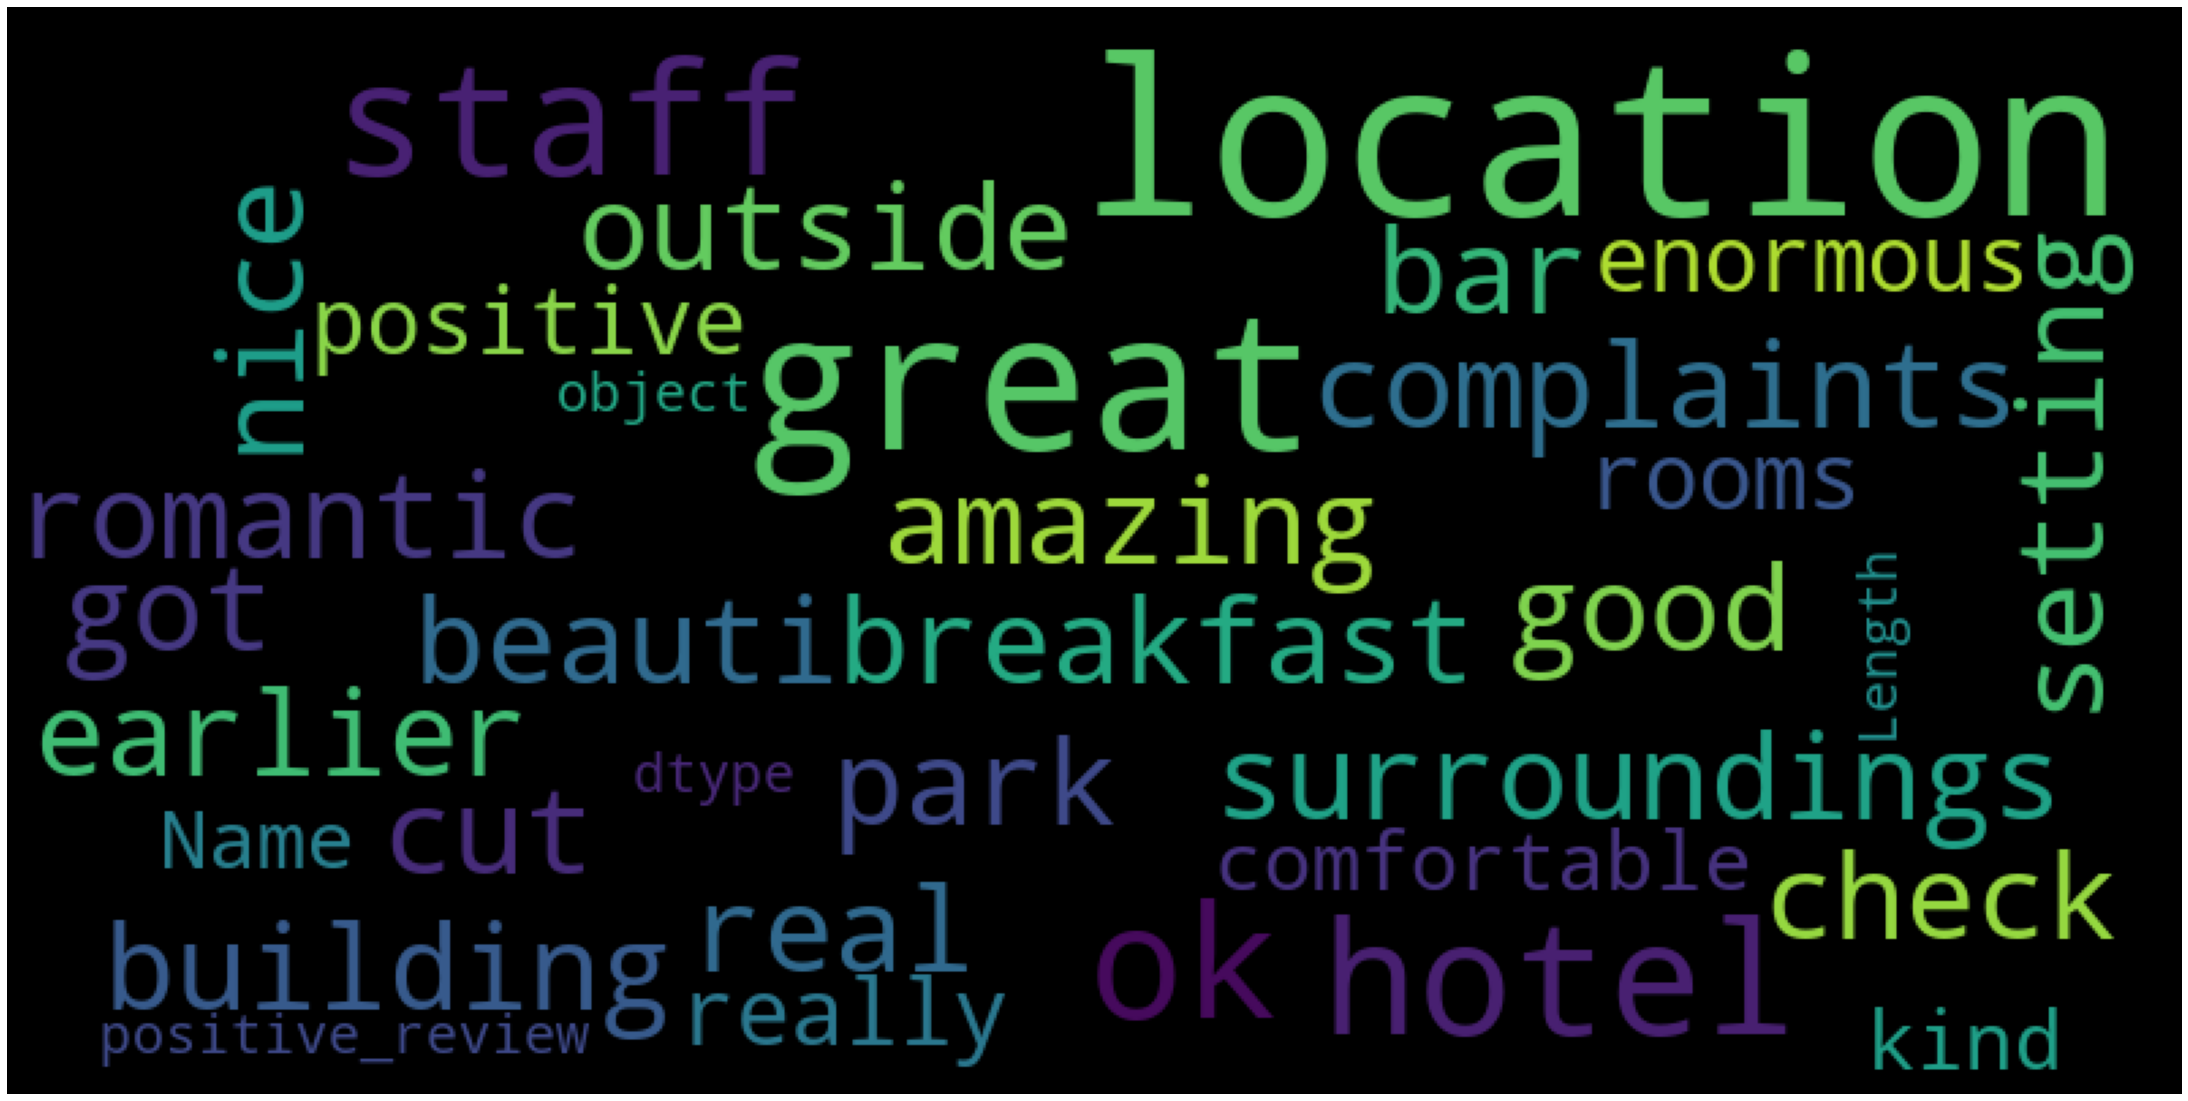

In [81]:
wordcloud = WordCloud(max_words = 500,max_font_size = 40, scale = 2,
                      random_state = 42).generate(str(hotel_dataset.positive_review))
fig = plt.figure(3, figsize = (40, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

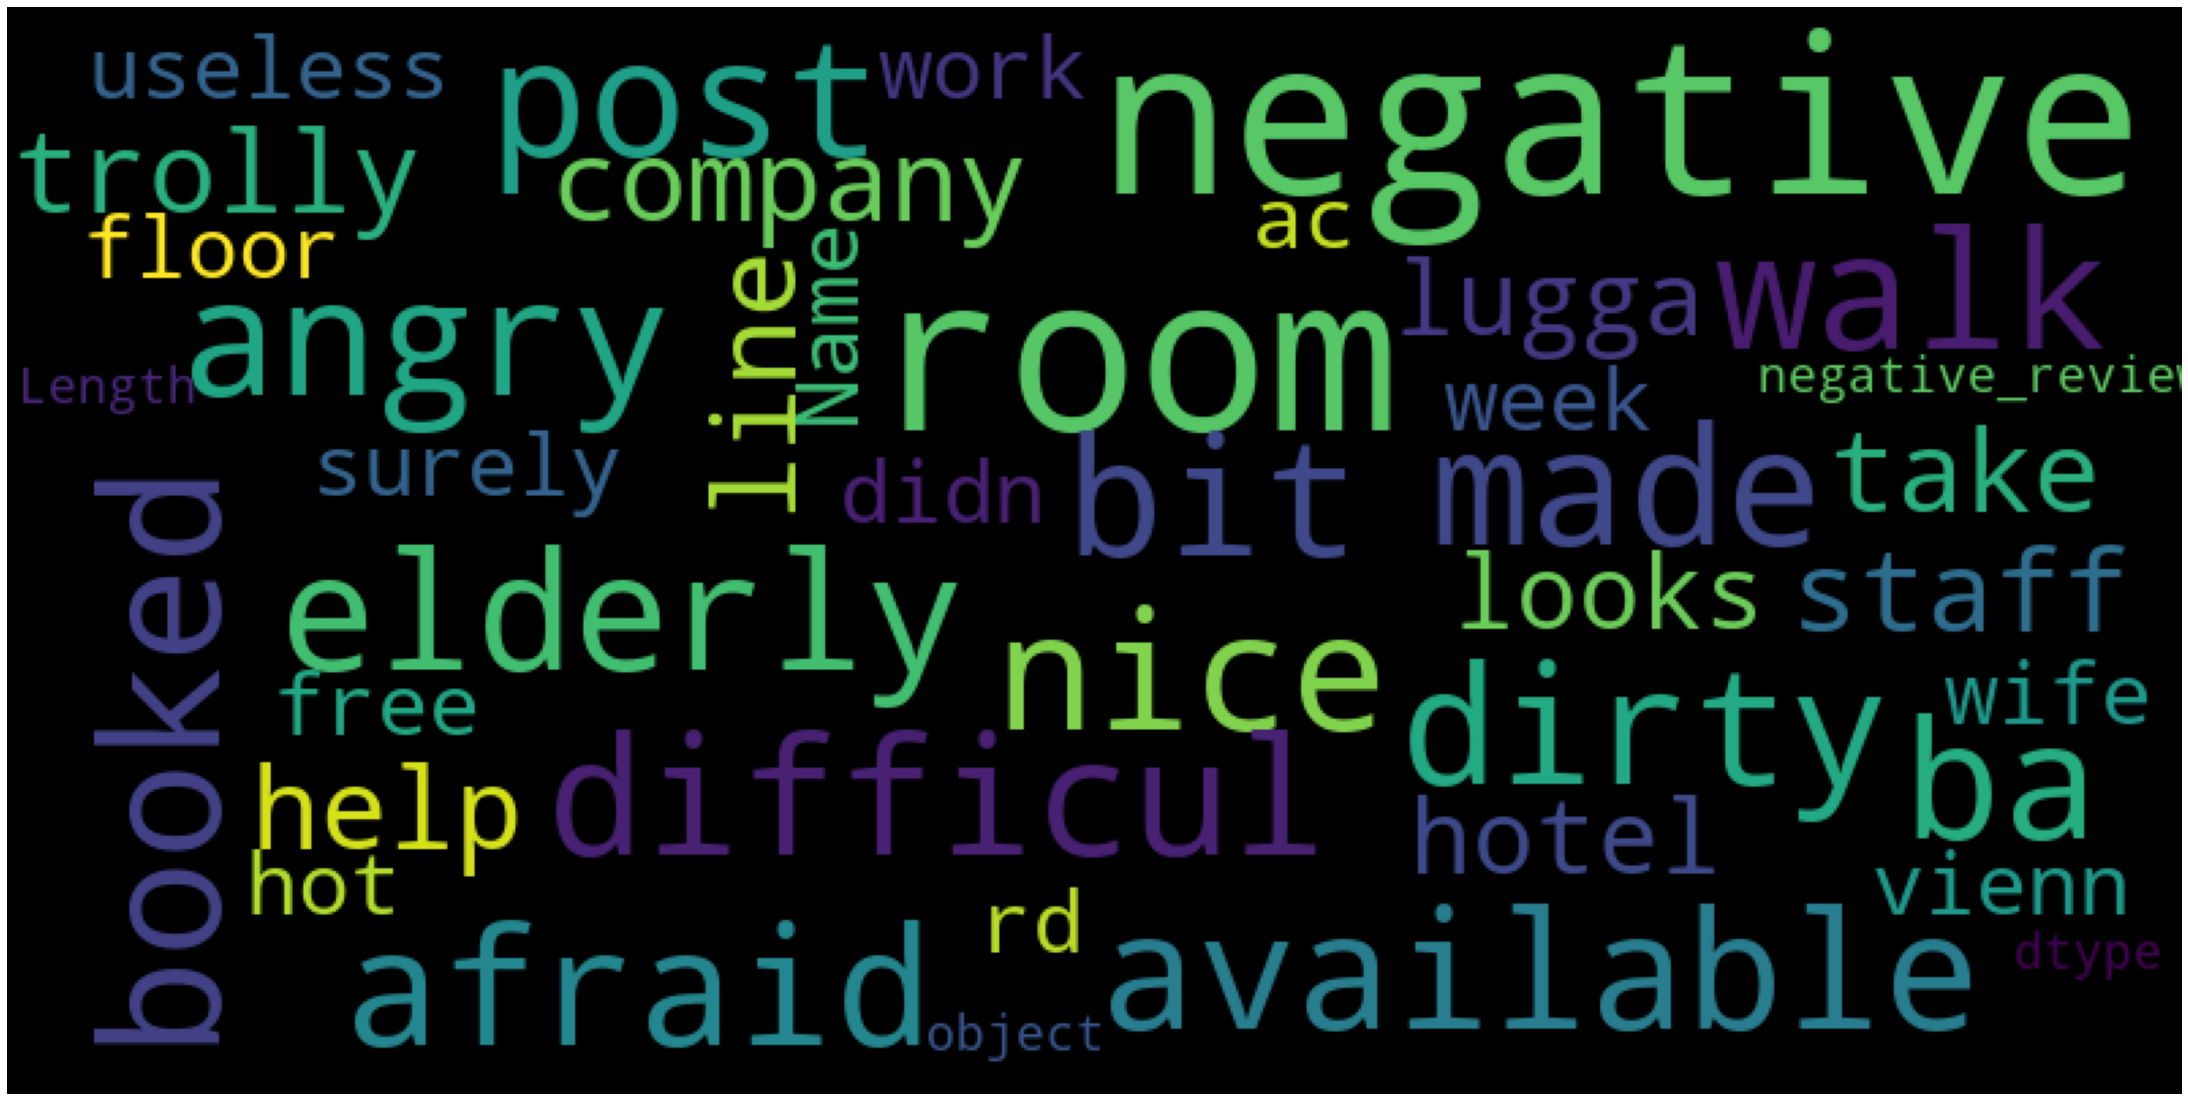

In [82]:
wordcloud = WordCloud(max_words = 500,max_font_size = 40, scale = 2,
                      random_state = 42).generate(str(hotel_dataset.negative_review))
fig = plt.figure(3, figsize = (40, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()